<span style="color:red">
Disclaimer: Do not share this Python notebook to third parties <br>
Atencao: Nao compartilhe esse Python notebook com outras pessoas </span>
<h1><b>Networks in socio-economic systems </b></h1>
<h3>Prof Luis E C Rocha - luis.rocha@ugent.be</h3>
<h4>Dept of Economics and Dept of Physics and Astronomy</h4>
<h4>Ghent University, Belgium</h4>
<h4><b>Version:</b> Federal University of Uberlandia, Brazil - November 2023 </h4>

<h1><b>Lab 2b: Fitting power-laws & network measures</b></h1>

<h3>Summary:</h3> The goal of this lab is to perform measures of assortativity, paths, clustering. We will also briefly talk about making linear regression between local network measures (nodes) and node attributes. The second part of the lab is about fitting power-laws to degree distributions. You might skip part 2 in the first reading (fitting a power-law).

<h2><b>(0:00-1:15h) Part 1 </b></h2>


<h2><b>1.</b> (0:00-0:15h) Network data</h2>

There are plenty of online repositories for network data. Here are some important ones:
<ul>
    <li> Index of Complex Networks: https://icon.colorado.edu </li>
    <li> The Konect Project: http://konect.cc </li>
    <li> Network Repository: http://networkrepository.com (the network definition is not always available, use with caution) </li>
    <li> SNAP large network data set: https://snap.stanford.edu/data/index.html </li>
    <li> Network catalogue and repository: https://networks.skewed.de </li>
    <li> You might find more data by simply typing "network data set" or "network data base" on google </li>
</ul>
<span style="color:blue">
<h4>For the group project and presentation</h4>
</span>
<ul>
    <li> Select a network from one of these databases or come up with your own data (original or not) </li>
    <li> The data set <b>must</b> be related to social or economic systems, i.e. biological, ecological, medical, are <b>not allowed</b> </li>
    <li> You must perform network analysis on your data, i.e. structural measures and their interpretation. Some other quantitative methods are allowed (e.g. regressions, classifications, forecasting, etc...) but at least 80% of the analysis must be with network methods seen in class, from week 1 to 6. </li>
    <li> Some ideas of analysis for the 1st assignment: </li>
    <ul>
        <li> tip 1: Try to think about comparative analysis between (somehow related) networks </li>
        <li> tip 2: Try to find meta-data that you can correlate with network structures, e.g. attributes of nodes vs structural properties of nodes </li>
        <li> tip 3: Do not limit yourself to very simple network measures, e.g. avg. degree, assortativity. Combine them with more elaborated analysis, e.g. degree distribution, k-core distribution, assortativity by features, etc. </li>
        <li> tip 4: Ask yourself: Does the result make sense? i.e., try to understand and interpret it. What are the implications of the network patterns/measures on "this" or "that"? </li>
    </ul>
</ul>

<h2><b>2.</b> (0:15-0:25h) A note on working with empirical network data</h2>

<ul>
    <li> <b>BE CAREFUL</b> </li>
    <ul>
        <li> with the source of your data </li>
        <li> with the quality of your data </li>
        <li> with the scope of your data </li>
    </ul>
    <li> <b>do not wildly</b> take measures of the network as soon as you see one! </li>
    <ul>
        <li> ask yourself if the data, data structure, and data description make sense </li>
    </ul>
    <li> always check and clean the data </li>
    <ul>
        <li> remove the noise, remove unreliable data points (i.e. nodes or edges), merge nodes or edges that represent the same thing (e.g. subject, object, entity, company, location) but maybe have different names (this is very common, e.g. Belgie/Belgique/Belgium) </li>
        <li> check if the data correspond to the same or different years. If not, acknowledge discrepancies and organise time periods </li>
        <li> keep track of what you are removing from the data. It is necessary to acknowledge what data were removed (or included) when reporting </li>
        <li> remember that you do not need to use everything in the data/network, as long as you justify your choices and acknowledge the limitations </li>
    </ul>
    <li> Check on the meaning of variables that you can or will use as weights of the edges </li>
    <ul>
        <li> Check if the variable is standardised for all edges, e.g. if all edges use the same currency or the same unit of weight </li>
        <li> Check for potential missing values, i.e. acknowledge missing values and/or try to replace with meaningful data, as for example by interpolation of values) </li>
        <li> Decide if it is better to set a threshold to convert a weighted network to an unweighted network, instead of using the weighted network. Most often, using a threshold is appropriate </li>
        <li> Decide if it is better to use the undirected or directed version of the network. Remember that several measures, such as clustering measures, are defined for undirected networks </li>
    </ul>
</ul>


<h2><b>3.</b> (0:25-0:45h) Network measures beyond degree</h2>

<h4>3.1. Assortativity</h4>


In [51]:
# Create an undirected network with the attribute colour for 8 nodes and 8 edges

import networkx as nx

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3], color = 'red')
G.add_nodes_from([4, 5, 6, 7], color = 'blue')
G.add_edges_from([(0,1), (1,2), (6,3), (2,7), (4,5), (5,0), (0,7), (7,1)])

# See notebook from week 2 about how to add a single node with a specific attribute per time

list( G.nodes(data=True) )


[(0, {'color': 'red'}),
 (1, {'color': 'red'}),
 (2, {'color': 'red'}),
 (3, {'color': 'red'}),
 (4, {'color': 'blue'}),
 (5, {'color': 'blue'}),
 (6, {'color': 'blue'}),
 (7, {'color': 'blue'})]

In [52]:
# Assortativity by degree

# for undirected and unweighted networks
r_deg = nx.degree_assortativity_coefficient(G)
print('Assort. by degree: %.2f' % r_deg)

# Assortativity by node attribute ("node color")
r_colour = nx.attribute_assortativity_coefficient(G, 'color')
print('Assort. by attribute: %.2f' % r_colour)


Assort. by degree: 0.59
Assort. by attribute: -0.27


In [53]:
# For directed and weighted networks

Q = nx.DiGraph()

# This is just a quick way to create a weighted network
Q.add_edges_from([(0, 1, {'weight': 3}), (2, 0, {'weight': 24}), (1, 2, {'weight': 35}), (1, 3, {'weight': 5}), (1, 5, {'weight': 55}), (0, 3, {'weight': 7})])
#nx.draw(Q, with_labels = True, pos = nx.spring_layout(Q, iterations=20), node_size = 1000, node_color = 'yellow')

print( Q.edges(data=True) )

# for directed networks, where x='out' (source), y='in' (sink) for directed edges
r_deg = nx.degree_assortativity_coefficient(Q, x='out', y='in')
print('Assort. by (directed) degree: %.2f' % r_deg)

# this gives the same results
r_deg = nx.degree_assortativity_coefficient(Q)
print('Assort. by (directed) degree: %.2f' % r_deg)

# to compare, this is the assortativity for the undirected version of this network
G = nx.Graph(Q)
r_deg = nx.degree_assortativity_coefficient(G)
print('Assort. by (undirected) degree : %.2f' % r_deg)

# for weighted networks, where "weight" is the weight of the edge
# Attention: this method only works for integer values of weight
# Trick: multiple the original weights by 10 or 100 and round the value to an integer, e.g.
# new_weight = int(100*weight)
# calculate the weighted assortativity using "new_weight"
r_deg = nx.degree_assortativity_coefficient(Q, weight='weight')
print('Assort. by weighted-degree: %.2f' % r_deg)


[(0, 1, {'weight': 3}), (0, 3, {'weight': 7}), (1, 2, {'weight': 35}), (1, 3, {'weight': 5}), (1, 5, {'weight': 55}), (2, 0, {'weight': 24})]
Assort. by (directed) degree: 0.16
Assort. by (directed) degree: 0.16
Assort. by (undirected) degree : -0.71
Assort. by weighted-degree: 0.64


<h4>3.2. Paths</h4>

There are some path-related measures you can use for various purposes.

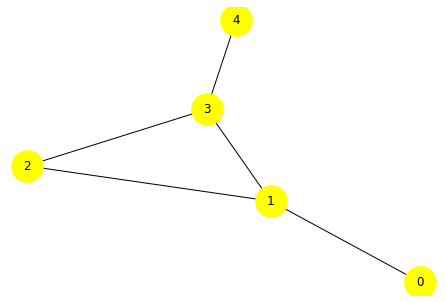

In [54]:
# Let us first create and print a network

import networkx as nx
#import matplotlib.pyplot as plt

#%matplotlib inline

# Create a simple network
H = nx.Graph([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4)])

#plt.figure()
nx.draw(H, with_labels = True, pos = nx.spring_layout(H, iterations=300), node_size = 1000, node_color = 'yellow')
#plt.show()

#print( list( G.nodes(data=True) ) )


In [55]:
# Check if there is a path betweeen 2 nodes
print( nx.has_path(H, source = 0, target = 4) )      # here and in the other methods below, you can use weight = 'weights' for edge-weights to be considered


True


In [56]:
# Find the shortest path between 2 nodes
print( nx.shortest_path(H, source = 0, target = 3) ) # method='dijkstra' is the default algorithm


[0, 1, 3]


In [57]:
# Calculate the length of the shortest-path (the distance) between 2 nodes
print( nx.shortest_path_length(H, source = 0, target = 3) )


2


In [58]:
# Calculate the average length of all the shortest paths in the network
# This can be quite computationally intensive if the network is too large and dense, therefore, use with caution
# Try first with a smaller network, e.g. N~1000 nodes and E~10000-2000 links
print( nx.average_shortest_path_length(H) )


1.6


In [59]:
# Calculate the diameter of the network
print( nx.diameter(H) )   # In this example network, it corresponds to the shortest-path between "0" and "4"


3


<h4>3.3. Clustering coefficient</h4>


In [60]:
# Let us first create a network

import networkx as nx

H = nx.Graph([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4)])

print( H.number_of_nodes() )


5


In [61]:
# Clustering coefficient of all nodes i in the network
print( nx.clustering(H) )

# Clustering coefficient of a single node
print("cc_2: %.3f" % nx.clustering(H, nodes = 1) )

# Clustering coefficient of a list of nodes in the network
print( nx.clustering(H, nodes = [2, 3]) )

# Average clustering coefficient of all nodes in the network
print("avg. cc: %.3f" % nx.average_clustering(H) )


{0: 0, 1: 0.3333333333333333, 2: 1.0, 3: 0.3333333333333333, 4: 0}
cc_2: 0.333
{2: 1.0, 3: 0.3333333333333333}
avg. cc: 0.333


In [62]:
# For multiple nodes, the method returns a list where the indexes represent the node IDs and the values represent the clustering coefficient of that node
# To convert this output to a pandas dataframe

import pandas as pd

df1 = pd.DataFrame.from_dict(nx.clustering(H), orient='index', columns=['clustering']) # orient -> orientation of the data, in this case index, i.e. each key will be converted to a row | columns -> column name

print(df1)


   clustering
0    0.000000
1    0.333333
2    1.000000
3    0.333333
4    0.000000


In [63]:
# A little recap from last week!

# 1. Calculate the degree of each node and store in a dataframe
df2 = pd.DataFrame( nx.degree(H), columns = ['node','degree'] )
df3 = df2.set_index('node')
print(df3)
# 2. Make a single dataframe of node structural properties
#    first column for degree and second column for clustering coefficient (of the very same nodes)

df4 = pd.concat([df3, df1], axis = 1)
print(df4)

# 3. Ask yourself: 
#    - Do nodes with high degree have high clustering or vice-versa?
#    - Why do nodes with degree 1 have clustering equal to zero?
#    Ps: This is just an hypothetical network but the question is always relevant and worth investigating
#    Ps: Later in this notebook, I show how to calculate the correlation and make a simple regression analysis


      degree
node        
0          1
1          3
2          2
3          3
4          1
   degree  clustering
0       1    0.000000
1       3    0.333333
2       2    1.000000
3       3    0.333333
4       1    0.000000


<h4>3.4. Other measures of clustering</h4>


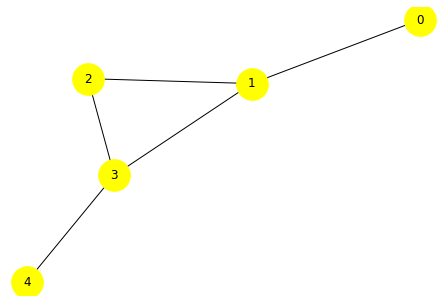

In [64]:
import networkx as nx
#import matplotlib.pyplot as plt

#%matplotlib inline

#plt.figure(figsize=(4,4), tight_layout=True)

# create a simple network
G.clear()
G = nx.Graph([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4)])

nx.draw(G, with_labels = True, pos = nx.spring_layout(G, iterations=300), node_size = 1000, node_color = 'yellow')
#plt.show()


In [65]:
# number of triangles in which the focal node i is involved
print('triangles: ', nx.triangles(G))

# closeness centrality of all the nodes i  -- better to avoid this measure for analysis and use k-core instead
print('closeness: ', nx.closeness_centrality(G))   # avoid closeness centrality

# transitivity of the network -- better to avoid this measure and calculate the average clustering coefficient instead
print('transitivity: %.3f' % nx.transitivity(G))   # remember the class? T = (3 x 2 triangles) / (14 triplets) = 0.42857


triangles:  {0: 0, 1: 1, 2: 1, 3: 1, 4: 0}
closeness:  {0: 0.5, 1: 0.8, 2: 0.6666666666666666, 3: 0.8, 4: 0.5}
transitivity: 0.429


In [66]:
# find all cliques in the network

# calculate all cliques in the network, from size 1 to maximum
# note that only cliques with at least 3 nodes are interesting
# this can be computationally intensive for larger networks, thus use with caution

# calculate the cliques
cliques = nx.enumerate_all_cliques(G)

# convert the cliques to a list of cliques
list_cliques = list(cliques)

print('cliques: ', list_cliques )    # it returns cliques of size 1, 2, 3, 4, 5 ...


cliques:  [[0], [1], [2], [3], [4], [0, 1], [1, 2], [1, 3], [2, 3], [3, 4], [1, 2, 3]]


In [67]:
# Better to iterate through the list to find the relevant cliques, especially if the network is large enough (i.e. hundreds of nodes and above)

# print a list containing the clique stored at position 5
print( list_cliques[5] )

# print the length of the clique stored at position 5
print( len(list_cliques[5]) )

# print each node (e.g. 0) in the clique stored at position 5
print( list_cliques[5][0] )


[0, 1]
2
0


<h4>3.5. Network core and node k-core</h4>


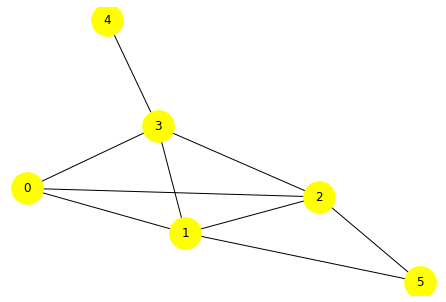

In [68]:
# find the k-core of a network
# Remember from the class, week 3: The k-core is a maximal subgraph that contains nodes of degree k or larger
# The core number of node i is the largest value k of a k-core containing that node

import networkx as nx

# create a simple network
G.clear()
#G = nx.Graph([(0, 1), (1, 2), (1, 3), (2, 3), (3, 4)])
G = nx.Graph([(0, 1), (1, 2), (1, 3), (2,3), (3,4), (0,3), (5,2), (5,1), (0,2)])

nx.draw(G, with_labels = True, pos = nx.spring_layout(G, iterations=300), node_size = 1000, node_color = 'yellow')


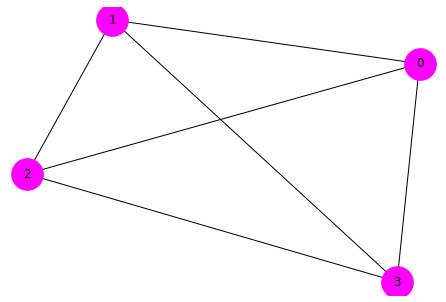

In [69]:
# create a sub-network H that is the core of the network G

H = nx.k_core(G)

nx.draw(H, with_labels = True, pos = nx.spring_layout(G, iterations=300), node_size = 1000, node_color = 'magenta')


[0, 1, 2, 3, 5] [0, 1, 2, 3, 4, 5]


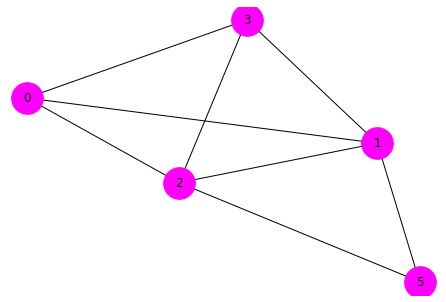

In [70]:
# one can choose a certain "k" OR "none" for the main core, i.e. the largest degree "k" before the network has no links

#nx.k_core(G, k = None)  

H = nx.k_core(G, k=2)

#========== Try some different values of k ====
#H = nx.k_core(G, k=3)
# and compare the outputs
print( list( H.nodes() ), list( G.nodes() ) )
# What happens?
#==============================================
nx.draw(H, with_labels = True, pos = nx.spring_layout(G, iterations=300), node_size = 1000, node_color = 'magenta')


node k-core:  {0: 3, 1: 3, 2: 3, 3: 3, 4: 1, 5: 2}
nodes in the core:  [0, 1, 2, 3]


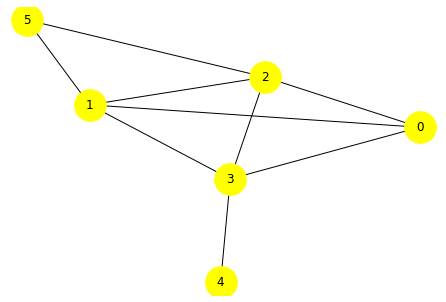

In [71]:
# The k-core of each node i can be calculated

import networkx as nx

G.clear()
G = nx.Graph([(0, 1), (1, 2), (1, 3), (2,3), (3,4), (0,3), (5,2), (5,1), (0,2)])

nx.draw(G, with_labels = True, pos = nx.spring_layout(G, iterations=300), node_size = 1000, node_color = 'yellow')

# The method bellow returns the core number (k-core) of each node
print("node k-core: ", nx.core_number(G) )

H = nx.k_core(G)
print("nodes in the core: ", list( H.nodes() ))

# In this example, first remove nodes with k=1, i.e. node 4. Then remove nodes with k=2, i.e. node 5 
# Then if we attempt to remove nodes with k=3, the network gets empty, thus the core of the network is 3 
# and the k-core of the remaining nodes is 3


Tip: There are no methods on networkx to detect the core-periphery of a directed network (bow-tie structure). If you need it, see this dedicated module: https://github.com/skojaku/core-periphery-detection


In [72]:
# Add all measures to the same dataframe for the analysis

import networkx as nx

G.clear()
G = nx.Graph([(0, 1), (1, 2), (1, 3), (2,3), (3,4), (0,3), (5,2), (5,1), (0,2)])

# calculate the network measure for each node and create a dataframe for that measure
df1 = pd.DataFrame( nx.degree(G), columns = ['node','degree'] )
df1 = df1.set_index('node')
df2 = pd.DataFrame.from_dict(nx.clustering(G), orient='index', columns=['clustering'])
df3 = pd.DataFrame.from_dict(nx.core_number(G), orient='index', columns=['k-core'])
df4 = pd.DataFrame.from_dict(nx.triangles(G), orient='index', columns=['triangles'])
df5 = pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index', columns=['closeness'])

# combine all dataframes into a single dataframe with all measures
df6 = pd.concat([df1, df2, df3, df4, df5], axis=1)

print(df6)


   degree  clustering  k-core  triangles  closeness
0       3    1.000000       3          3   0.714286
1       4    0.666667       3          4   0.833333
2       4    0.666667       3          4   0.833333
3       4    0.500000       3          3   0.833333
4       1    0.000000       1          0   0.500000
5       2    1.000000       2          1   0.555556


In [73]:
# with this combined dataframe, it is easier to manipulate/operate the data. Review lab week 2 about pandas

# returns all values in the column clustering, i.e. column "1"
#df6.iloc[:,1]

# returns all values in the column clustering
#df6['clustering']

# returns all columns/measures in the row "3", i.e. all measures for node "3"
df6.iloc[3,:]


degree        4.000000
clustering    0.500000
k-core        3.000000
triangles     3.000000
closeness     0.833333
Name: 3, dtype: float64

<h2><b>4.</b> (0:45-0:55h) Fitting a function to data </h2>

It is often useful to make a correlation analysis or regression analysis of two variables. The two variables can be either structural measures of nodes (or of several distinct networks) or non-structural measures of nodes, e.g. age, income, revenue, stock price, value, etc. Here we review a simple routine for linear regression. For more advanced methods/fitting routines, see the modules for statistical analysis, e.g. https://docs.scipy.org/doc/scipy/reference/stats.html.


Slope: 7.136 / Intercept: -9.403
Pearson corr: 0.972 / p-value: 0.001


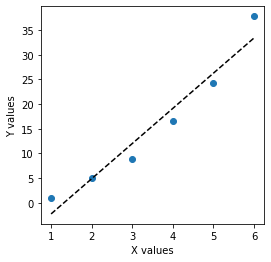

In [74]:
# Simple linear regression

import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

#%matplotlib inline

# Generate some artificial data for "x" and "y" or get some real data
x = list(range(1,7))      # i.e. the same as x = [1, 2, 3, 4, 5, 6]
#y = [2, 1, 3, 8, 3, 7]
#y = [i**2 for i in x]    # i.e. the same as y = [1, 4, 9, 16, 25, 36]
# This is just an artificial example. A little noise is added to y, i.e. "i^2 + noise"
y = [i**2 + np.random.standard_normal() for i in x]   

# calculate simple linear regression -ordinary least squares- and send output to a
a = st.linregress(x , y)        
#print(a)                    # print full output
#print(a[0])                 # print one output  -> a[0] is the slope | a[1] is the intercept | a[2] is Pearson correlation | a[3] is p-value of fitting | a[4] st_error -> To calculate the confidence interval (CI) from the std_error, see https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1255808/  C.I (95%)= slope +- 1.95*std_error
print("Slope: %.3f / Intercept: %.3f" % (a[0], a[1]) )
print("Pearson corr: %.3f / p-value: %.3f" % (a[2], a[3]) )

# plot the results
plt.figure(figsize=(4, 4))

# scatter plot of x and y values in the original data
plt.scatter(x, y)

# calculate the fitted "y" values -for the given values of "x"- based on the fitted parameters a[0] (slope) a[1] (intercept)
y_fit = [i * a[0] + a[1] for i in x]

# dashed line plot of the fitted values
plt.ylabel('Y values')
plt.xlabel('X values')
plt.plot(x, y_fit, 'k--')

plt.show()


Slope: 0.625 / Intercept: 0.625
Pearson corr: 0.945 / p-value: 0.004


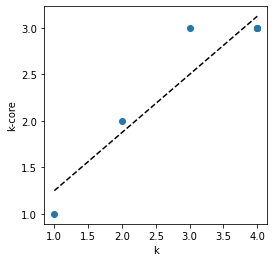

In [75]:
# Simple linear regression - using data from a pandas dataframe, e.g. the network measures above
# You can use this routine in the assignments

import matplotlib.pyplot as plt
import scipy.stats as st

#use the data in a pandas dataframe
x = df6.iloc[:,0]         # i.e. x has the degree of nodes, stored in dataframe df6 (column 0)
y = df6.iloc[:,2]         # i.e. y has the k-core of nodes, stored in dataframe df6 (column 2). See above

a = st.linregress(x , y)  # calculate linear regression and send output to a
#print(a)                 # all outputs
#print(a[0])              # one output  -> a[0] is the slope | a[1] is the intercept | a[2] is Pearson correlation | a[3] is p-value of fitting
print("Slope: %.3f / Intercept: %.3f" % (a[0], a[1]) )
print("Pearson corr: %.3f / p-value: %.3f" % (a[2], a[3]) )

# plot the results
plt.figure(figsize=(4, 4))

# scatter plot of x and y values in the original data
plt.scatter(x, y)

# calculate the fitted "y" values -for the given values of "x"- based on the fitted parameters a[0] (slope) a[1] (intercept)
x_fit = list( range( min(list(x)), max(list(x))+1 ) )
y_fit = [i * a[0] + a[1] for i in x_fit]

# dashed line plot of the fitted values
plt.ylabel('k-core')
plt.xlabel('k')
plt.plot(x_fit, y_fit, 'k--')

plt.show()


In [76]:
# Advanced fitting tools, see more on https://www.tutorialspoint.com/scipy/scipy_odr.htm
# Example below works for linear fitting, you only need to change "x" and "y" to your data, if you want to use this routine

# You should use orthogonal distance regression where there is uncertainty in both axes. 
# Generally speaking, ordinary least squares, as done above, is sufficient

from scipy.odr import Model, Data, ODR        # ODR: orthogonal distance regression -> more general than ordinary least squares
import numpy as np

x = []
y = []
x = list(range(1,7))            # <- ADD HERE YOUR X DATA
y = [i**2 for i in x]           # <- ADD HERE YOUR Y DATA

param = []

# First - define a function
def f(B, x):
    #Linear function y = m*x + b
    return B[0]*x + B[1]

# Second - make the fit
def fit(x, y):
    # Create a model for fitting, using the function defined above
    linear = Model(f)

    # Assuming an error given by the normal distribution
    sx = np.abs( np.random.normal(0, 2, len(x)) )
    sy = np.abs( np.random.normal(0, 2, len(y)) )

    # Take the values of x and y from your data
    mydata = Data(x, y)

    # Make linear regression on your data, using orthogonal distance regression
    # You can use other functional forms, see https://docs.scipy.org/doc/scipy/reference/odr.html
    # like polynomial functions, exponential function
    myodr = ODR(mydata, linear, beta0=[1., 1.])   # -> starting values for the parameters
    myoutput = myodr.run()
    
    return myoutput

f_output = fit(x, y)

print("Slope: %.3f / Intercept: %.3f " %(f_output.beta[0], f_output.beta[1]))


Slope: 7.299 / Intercept: -10.380 


<h2><b>5.</b> (0:55-1:30h) Get your hands dirty </h2>
This exercise aims to compare different structures of different networks using the methods above. Analyse one network per time, and then make a comparative analysis between different networks. Try to find trends and interpret the results in the context of the data set.

<ul>
    <li> Go to: https://users.ugent.be/~lcorread/courses/week2/ </li>
    <li> Download the 3 data sets below </li>
    <ul>
        <li> Email </li>
        <li> Phone</li>
        <li> Collaboration </li>
        <li> Ps: Nodes are labelled from 0 continuously. Each line contains two node labels A and B, representing either a directed link A->B or an undirected link A-B. Undirected links appear only once in the file.</li>
    </ul>
    <li> See more details about these networks in the lab week 2 </li>
</ul>

<h3>Proposed Analysis</h3>

<ul>
    <li> Basic analysis </li>
    <ul>
        <li> Measure the asssortativity of these networks </li>
        <ul>
            <li> What does the assortativity tell you about each system/network? </li>
        </ul>
        <li> Measure the average clustering coefficient of each of these networks </li>
        <ul>
            <li> Rank the networks according to their clustering level </li>
            <li> For a given network, rank the nodes according to their clustering level </li>
            <ul>
                <li> (tip) use the method to sort rows using a pandas dataframe, lab 2 </li>
                <li> it might be useful to plot the ranked values (x-axis: rank | y-axis: clustering coefficient) </li>
            </ul>
            <li> What is the meaning of (your measure of) clustering in each of these networks? </li>
            <li> Which network is more robust against failures i.e. has more redundancies? </li>
        </ul>
        <li> Identify which networks have the small-world property </li>
        <ul>
            <li> Which network do you think is the "smallest-world"? Why? </li>
            <li> What is the meaning/consequence of being small-world in each of these networks? </li>
        </ul>
        <li> Compare the chosen networks with the networks shown in the lecture (see lecture slides, week 2) </li>
        <ul>
            <li> Any similarities or differences in the structure? </li>
            <li> Can you find any trends? e.g. technological vs. social networks </li>
        </ul>
        <li> Measure the k-core of each node </li>
        <ul>
            <li> What is the core of the network? try to show/plot the core </li>
            <li> What is the highest k-core in the network? </li>
        </ul>
    </ul>
    <li> Correlation Analysis </li>   
    <ul>
        <li> For a given network, select a few node-level measures </li>
        <ul>
            <li> Make a scatter plot of two measures per time </li>
            <li> Calculate the linear regression between them </li>
            <li> Calculate the Pearson correlation coefficient between them </li>
            <li> Do you find any trends? </li>
            <li> If two measures are correlated, what does it mean? If two measures are not correlated, what does it mean? </li>
        </ul>
        <li> Compare results of different networks (at least 3) </li>
        <ul>
            <li> Are the correlations the same for the same pair of measures on different networks? </li>
            <li> What does this type of analysis can tell you about the structural properties of the nodes? </li>
        </ul>
        <li> If you could get <b>non-structural</b> attributes/characteristics of the nodes, e.g. age, income, revenues, stock-price, what attributes would be interesting to analyse the correlations with a <b>structural</b> node property? In other words, could the structural information be an economic or social indicator? </li>
    </ul>
        <li> (homework) Advanced Analysis </li>   
    <ul>
        <li> Calculating the average shortest-path length is demanding for the computer. How would you do the calculations differently? </li>
        <ul>
            <li> tip: think about sampling nodes, i.e. sample 2 nodes and calculate the shortest distance between them. Then sample 2 more nodes and repeat. Over time, this should converge to the true mean, following the law of large numbers </li>
        </ul>
        <li> Plot the node degree vs the avg. degree of its direct neighbours </li>
        <ul>
            <li> Calculate the correlation in this plot and compare with the assortativity </li>
        </ul>
        <li> What is the average shortest-path (avg. distance) between all pairs of nodes with degree above k' (you choose k') in comparison to the avg. distance between any two nodes in the network?  </li>
        <ul>
            <li> What the results mean? </li>
            <li> (tip) you can make a graph with varying k' in the x-axis and avg. shortest paths in the y-axis </li>
        </ul>
        <li> What is the distribution of the clustering coefficients of nodes for a given network? </li>
        <ul>
            <li> (tip) make a plot similar to the degree distribution (see lab 2, histogram) but remember that here the values go from 0 to 1 </li>
            <li> (tip) a simple method is to multiply de values of the clustering coefficient by 100 and transform the result to integer, i.e. $cc_i = int(100 \times cc_i)$. Then, you can use exactly the same routine as for the degree distribution. This gives you the $cc_i$ with 2 significant digits, to increase accuracy, you can multiply by 1000 and so on. </li>
        </ul>
        <li> Count the number of cliques of size 4 in each network </li>
        <ul>
            <li> What is the avg. degree of the nodes in these cliques in comparison to all nodes in the network? </li>
            <li> tip: you can make a graph with varying clique size in the x-axis and avg. degree in the y-axis </li>
        </ul>
        <li> Implement the algorithm (from scratch) to calculate the k-core of each node </li>
        <ul>
            <li> (tip) it is an iterative process </li>
        </ul>
    </ul>
</ul>


In [77]:
# Solutions

# Just copy and paste the pieces of codes and adapt to the networks that you want to analyse

# lab 2 shows how to read the network from a file and create a network object
# this notebook has the routines to make the network calculations
# lab 2 and lab 1 have routines to plot data


<h1>15 min break! </h1>

<h2><b>(1:30-2:45h) Part 2 </b></h2>

<h2><b>5.</b> (1:45-2:45h) Fitting the degree distribution </h2>

Besides visualising the degree distribution, it is often important to fit the data to quantity the distribution for further analysis, e.g. for the comparison of networks, or to link with explanatory network models. Given that network data can be limited, sometimes the empirical distribution cannot be easily fitted. In many cases, however, a skewed distribution is observed and a power-law of the form $f(k)=C k^{-\alpha}$ are often the appropriate function to fit the degree distribution.
<br><br>
The standard way of fitting a power-law to real data is by taking the logarithm on both axes and then fitting a straight line such that:
<ul>
    <li> $f(k)=C k^{-\alpha}$ </li>
    <li> $\log(f(k)) = \log(C) - \alpha \log(k)$ </li> 
    <li> $Y = D - \alpha X$, where:</li>
    <ul>
        <li> $Y := \log(f(k))$ </li>
        <li> $X := \log(k)$ </li>
        <li> $D := \log(C) \rightarrow C = e^{D}$ </li>
    </ul>
    <li> $\alpha$ is the exponent of the power-law </li>
</ul>
<ul>
    <li> These Python methods might be useful:
    <ul>
        <li> import numpy as np
        <li> D = np.log10(C)
        <li> C = np.exp(D)
    </ul>
</ul>

<ul>
    <li> There are some statistical methods to improve the quality of the fitting </li>
    <ul>
        <li> they can be used for any distribution, not only for the degree distribution </li>
        <li> use the cumulative distribution (preferred method, see slides week 2). In this case, you must fit the function: $\text{cum}(f(k)) = \sum_{k'=k}^{k_{max}} f(k') = F(k) = A k^{-\alpha+1}$ </li>
        <li> use log-bins (i.e. (0-1], (1,2], (2,4], (4, 8], (8, 16], .... ) instead of decimal bins (i.e. (0-2], (2,4], (4,6], (6, 8], ....) to build your distribution </li>
        <li> note that you can also define a range of values in which you want to fit the power-law. this is often accepted because the distribution is noisy for small and very large values of degree. However, the fitting must happen on at least 2 decades in the log-scale, e.g. from 1-100, or 10-1000. </li>
    </ul>
    <li> For more theory on power-laws, see http://www-personal.umich.edu/~mejn/courses/2006/cmplxsys899/powerlaws.pdf
    <li> For some degree distributions, a power-law with exponential cutoff (i.e. $f(k)= \frac{C} {k^{\alpha}} e^{-\beta k}$) or a log-normal (i.e. $f(x) = \frac{1}{\sigma x\sqrt{2\pi}} e^{-(\log(x) - \mu)^2/2 \sigma^2}$) are more appropriate than a pure power-law </li>
</ul>
<ul>
    <li> Fitting degree distributions using power-laws </li>
    <ul>
        <li> There is a Python module to help fitting power-laws called "powerlaw", see: https://pypi.org/project/powerlaw/ </li>
        <li> You can install the module </li>
        <ul>
            <li> using Anaconda -> environments </li>
            <li> or by opening the terminal and typing: conda install -c conda-forge powerlaw </li>
        </ul>
        <li> For more details on using this module, see this paper: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777 </li>
        <ul>
            <li> be careful because some methods/options from this module might not work in newer versions of Python 3.x </li>
            <li> this limitation is especially true if you want to add fancy features to plots </li>
        </ul>
    </ul>
</ul>


<h4>5.1. Visualising the distributions</h4>


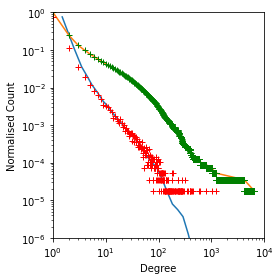

In [1]:
# Visualisation of the distribution and cumulative distribution

import networkx as nx
import powerlaw as pw
import matplotlib.pyplot as plt

# First read the network from a file - this format is edge list
G = nx.read_weighted_edgelist('./data/week2_email.edgelist.txt', comments = '#', create_using=nx.Graph(), nodetype = int, delimiter=',')#, encoding='utf-8')

G = nx.Graph(G)                                 # Remove multiple edges
G.remove_edges_from( nx.selfloop_edges(G) )     # Remove self-loops

# create a list of degrees, using list comprehension
k = [val for (node, val) in nx.degree(G)]

# Draw the pdf and cumulative pdf
plt.figure(figsize = (4,4), tight_layout = True)
plt.ylim(0.000001, 1)
plt.xlim(1, 10000)
plt.ylabel('Normalised Count')
plt.xlabel('Degree')

# To plot the pdf and the cumulative pdf (ccdf) of the degree
# Input to the method is the set of observations, i.e. set of degrees - the degree values -, NOT the histogram of degrees
# Default is to plot using logarithmic binning. This can be changed using "linear_bins=True".
# (tip) Note that this method is for the degree distribution but can be used for any node measure if the values are integer, e.g. k-core
pw.plot_pdf(k)
pw.plot_ccdf(k)

#---------------------------------------------------------------------------------------------------------------------
# For your reference and understanding, the method "pw.plot_ccdf(k)" above is equivalent to:
h_deg = nx.degree_histogram(G)                      # degree distribution            - we did that in week 2
h_deg_n = [x / G.number_of_nodes() for x in h_deg]  # normalised degree distribution
x_deg = list( range(0, len(h_deg)) )                # list of degree values

cum_h_deg_n = len(h_deg)*[0]                        # initialise a list of zeros
i = 1
while i < len(h_deg):    
    cum_h_deg_n[i] = sum( h_deg_n[i:len(h_deg)] )   # calculate the cumulative distribution for each value of degree k
    i += 1                                          # equivalent to i = i + 1

# plot the distributions "using my code" on the same graph for comparison
plt.plot(x_deg, h_deg_n, 'r+')                      # for the pdf plot using red crosses
plt.plot(x_deg, cum_h_deg_n, 'g+')                  # for the cumulative plot using green crosses
#---------------------------------------------------------------------------------------------------------------------

plt.show()

# Why do you think there is a little mismatch between my plot (in red) and the blue line? (think about the binning method)


<h4>5.2. Fitting the data to a power-law </h4>


In [2]:
# Fitting the data to a power-law 

# the object "fit" contains statistical information about the fitting done using the method pw.Fit(k)
fit = pw.Fit(k)                             # input is the list of degrees

# Exponent of the power-law alpha
print("Exponent: %.3f" % fit.alpha )
# sigma is the standard error of the exponent alpha, i.e. "alpha +- sigma". To calculate the confidence interval (CI) from the error, see https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1255808/  C.I (95%)= [alpha +- 1.95*error] 
print("Exponent error: %.4f" % fit.sigma )

# x_min is defined by testing various values of (xmin) and calculating the minimal "Kolmogorov-Smirnov distance" (D) 
# between the data and the fit
print("Kolmogorov-Smirnov: %.4f" % fit.D)   # (goodness of fit) the fit function finds the minimal Kolmogorov-Smirnov "distance" between the data and the fit to a power-law. It is a measure of the difference between two distributions. For more details, see https://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm
print("x_min: ", fit.xmin)                  # x_min is found such that D is minimised


Exponent: 2.893
Exponent error: 0.1200
Kolmogorov-Smirnov: 0.0288
x_min:  81.0


Calculating best minimal value for power law fit
/Users/luisrocha/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


/Users/luisrocha/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


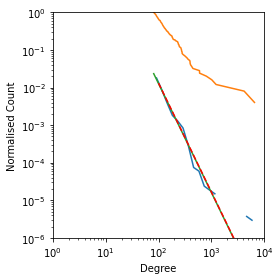

In [3]:
# Visualisation of the distribution and cumulative distribution together with the best fit

# Draw the pdf and cumulative pdf
plt.figure(figsize = (4,4), tight_layout = True)
plt.ylim(0.000001, 1)
plt.xlim(1, 10000)
plt.ylabel('Normalised Count')
plt.xlabel('Degree')

# Plot the original values considering the output of the fitting function "fit=pw.Fit(k)", specially x_min.
# Note that the method also renormalises the distribution
# For this email network, that means the power-law fits the "tail" of the distribution
# Draw the empirical pdf taking into account the x_min - in blue
fit.plot_pdf()

# Draw the empirical cumulative pdf taking into account the x_min - in orange
fit.plot_ccdf()

# Plot a power-law function using the best fitted values - in green
fit.power_law.plot_pdf()

#---------------------------------------------------------------------------------------------------------------------
# For your reference and understanding, the method above is equivalent to
x = list( range(100,10000) )
y = list( [ 8000/(i**2.893) for i in x ] )   # this is a list comprehension -> for each "i" in the list "x", output 1/(i**2.5)
plt.plot(x, y, 'r--')                        # pdf - draw a dashed line in red
#---------------------------------------------------------------------------------------------------------------------

plt.show()


Calculating best minimal value for power law fit
/Users/luisrocha/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


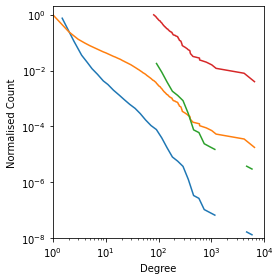

In [4]:
# Exercise: compare the empirical distribution and the fitted distribution
# Why is there a mismatch on the y-values but the shape of the curves are the same?

import networkx as nx
import powerlaw as pw
import matplotlib.pyplot as plt

# First read the network from file - this format is edge list
G = nx.read_weighted_edgelist('./data/week2_email.edgelist.txt', comments = '#', create_using=nx.Graph(), nodetype = int, delimiter=',')#, encoding='utf-8')
#G = nx.read_weighted_edgelist('./data/week2_citation.edgelist.txt', comments = '#', create_using=nx.Graph(), nodetype = int, delimiter=',')#, encoding='utf-8')

G = nx.Graph(G)                                 # Remove multiple edges
G.remove_edges_from( nx.selfloop_edges(G) )     # Remove self-loops

k = [val for (node, val) in nx.degree(G)]       # create a list of degrees

# Draw the pdf and cumulative pdf
plt.figure(figsize = (4,4), tight_layout = True)
plt.ylim(0.00000001, 2)
plt.xlim(1, 10000)
plt.ylabel('Normalised Count')
plt.xlabel('Degree')

# draw the empirical distributions
pw.plot_pdf(k)    # in blue
pw.plot_ccdf(k)   # in orange

# draw the empirical distributions, using the estimated "x_min" and the "renormalisation"
fit = pw.Fit(k) 
fit.plot_pdf()    # in green
fit.plot_ccdf()   # in red

plt.show()


<h4>5.3. Fitting the data to a log-normal </h4>

The log-normal distribution sometimes gives a better fit than a power-law.


/Users/luisrocha/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:1605: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Mu: -765.956
Sigma: 20.188
Kolmogorov-Smirnov: 0.0288
x_min:  81.0


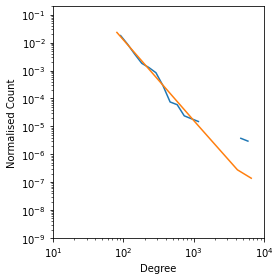

In [5]:
# Fitting the data to a log-normal distribution

# Draw the pdf and cumulative pdf
plt.figure(figsize = (4,4), tight_layout = True)
plt.ylim(0.000000001, 0.2)
plt.xlim(10, 10000)
plt.ylabel('Normalised Count')
plt.xlabel('Degree')

# Draw the empirical pdf taking into account the x_min - in blue
fit.plot_pdf()

# Plot a log-normal function using the best fitted values - in orange
fit.lognormal.plot_pdf()           # for a log-normal

# Print the estimated parameters of the log-normal
# Parameter mu
print("Mu: %.3f" % fit.lognormal.mu)            # $\mu$ is the mean of the log-normal distribution, see above.  
#print("Mu: ", fit.lognormal.parameter1_name)   # returns the name of the parameter

# Parameter sigma
print("Sigma: %.3f" % fit.lognormal.sigma)      # $\sigma$ is the standard deviation of the log-normal distribution 
#print("Sigma: ", fit.lognormal.parameter2_name)

# x_min is defined by testing various values of (xmin) and calculating the minimal "Kolmogorov-Smirnov distance" (D) 
# between the data and the fit
print("Kolmogorov-Smirnov: %.4f" % fit.D)   # (goodness of fit) the fit function finds the minimal Kolmogorov-Smirnov "distance" between the data and the fit to a log-normal. It is a measure of the difference between two distributions. For more details, see https://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm
print("x_min: ", fit.xmin)                  # x_min is found such that D is minimised


<h4>5.4. Comparing theoretical distributions</h4>

<ul>
    <li> Is the power-law the best distribution (best fit) for your data? </li>
    <li> It is recommended to compare the power-law with the log-normal and the exponential </li>
</ul>

<ul>
    <li> $R$ is the loglikelihood ratio between the two candidate distributions - i.e. the goodness of fit of two competing statistical models </li>
    <ul>
        <li> if positive, the data is more likely best described by the first distribution </li>
        <li> if negative, the data is more likely best described by the second distribution </li>
        <li> the significance value for that direction is the $p$-value.
        <li> as usual, $p <0.05$ indicates that the two models are not equal and thus either the first or second distribution is correct, according to the direction of $R$ </li>
    </ul>
</ul>


In [85]:
# To compare two competing distributions
# R>0 -> the first distribution is the best
# R<0 -> the second distribution is the best
# p -> p-value

# To compare the power-law with the exponential
#R, p = fit.distribution_compare('power_law', 'exponential')

# To compare the power-law with the lognormal
R, p = fit.distribution_compare('power_law', 'lognormal')

# To compare the power-law with the strechted exponential - p(x) ~ exp(-x^{\beta})
#R, p = fit.distribution_compare('power_law', 'stretched_exponential')

# To compare the power-law with the truncated_power_law (also called power-law with exponential cutoff) - p(x) ~ x^{-\alpha}*exp(-bx))
#R, p = fit.distribution_compare('power_law', 'truncated_power_law')

# print the output
print("R: %.2f / p-value: %.4f" %(R, p))


R: 1.16 / p-value: 0.0125


/Users/luisrocha/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


<h4>5.4. Sampling from a power-law distribution</h4>

The module has methods to generate values (sample values) from a given power-law distribution. This is useful if you want to generate networks using the configuration model, see week 6.
You can also implement the sampling from scratch, see Table D.1 (p40) in this paper: https://arxiv.org/abs/0706.1062


Calculating best minimal value for power law fit


5.966572294885229
x_min: 5.000 / alpha: 2.499 


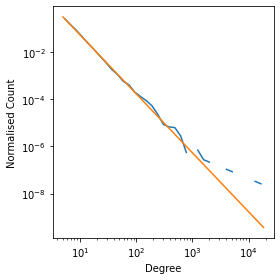

In [86]:
# Generate values (sample values) from a given power-law distribution

# Draw the pdf and cumulative pdf
plt.figure(figsize = (4,4), tight_layout = True)
#plt.ylim(0.000000001, 0.2)
#plt.xlim(10, 10000)
plt.ylabel('Normalised Count')
plt.xlabel('Degree')

# define the parameters of the theoretical power-law distribution, i.e. x_min and exponent \alpha 
theoretical_distribution = pw.Power_Law(xmin=5.0, parameters=[2.5])

# generate 10000 samples, i.e. a sequence of 10000 degrees
simulated_data = theoretical_distribution.generate_random(10000)

# access the generated samples
# list of the generated values (i.e. generated degrees "k") in the sample
samples = list(simulated_data)
# returns one value from the sample
print(samples[0])

# Fit a power-law to the distribution of the generated values in the sample
# this is used to double check if the generated sample has the correct values
fit = pw.Fit(simulated_data)
print( "x_min: %.3f / alpha: %.3f "% (fit.power_law.xmin, fit.power_law.alpha) )

# Plot the simulated data and the fitted data
# plot the simulated data, i.e. coming from the sample procedure
pw.plot_pdf(simulated_data)

# plot the best power-law fit to the simulated data
fit.power_law.plot_pdf()

plt.show()


<h2><b>7.</b> (2:30-2:45h) Get your hands dirty</h2>
Similar to the previous exercise, try to first visualise and then fit the degree distribution using the methods in the package "powerlaw". Analyse the output and compare the fitted parameters across different networks.

<ul>
    <li> Go to: https://users.ugent.be/~lcorread/courses/week2/ </li>
    <li> Download some network data sets, for example: </li>
    <ul>
        <li> Email </li>
        <li> Phone</li>
        <li> Collaboration </li>
        <li> Skip the protein and metabolic networks because they are out of the scope for interpretation </li>
        <li> Skip the actor network because it is too large </li>
        <li> Ps: Nodes are labelled from 0 continuously. Each line contains two node labels A and B, representing either a directed link A->B or an undirected link A-B. Undirected links appear only once in the file.</li>
    </ul>
    <li> See more details about these networks in the lab week 2 </li>
</ul>

<h4>Proposed Analysis</h4>

<ul>
    <li> Basic analysis </li>
    <ul>
        <li> Plot the degree distribution of each network using the methods we just saw </li>
        <li> Plot the cumulative degree distribution of each network </li>
        <li> Estimate the $x_{min}$ and the exponent $\alpha$ of each network </li>
        <li> Would be OK to discard nodes with degree $k < x_{min}$ for your analysis? What that means? </li>
    </ul>
    <li> Best fit </li>
    <ul>
        <li> Compare the goodness of fit between the power-law and exponential, and the power-law and log-normal distributions </li>
        <li> What does it mean that the distribution fits better to a power-law than to an exponential? </li>
        <li> Are there any trends in the fitting parameters for different classes (social vs. technological) of networks? </li>
        <li> Comparatively, what can you say about the degree distribution? any insights? </li>
    </ul>
    <li> (homework) Advanced analysis </li>
    <ul>
        <li> Repeat the fitting exercise and analysis for other network measures, e.g. clustering coefficient, k-cores, number of triangles </li>
        <li> Are the exponents of the distributions the same for all networks? </li>
        <li> Check the original paper of this module powerlaw or read online what are the other functionalities/methods available in the module </li>
        <ul>
            <li> Can you fix $x_{min}$ or $x_{max}$? </li>
            <li> Can you test the power-law against other competing distributions (besides exponential and log-normal)? </li>
        </ul>
    </ul>
</ul>


In [87]:
# Solutions

# Just copy and paste the functions using the networks that you want to analyse


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/luisrocha/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


x_min: 0.002 / alpha: 1.223 


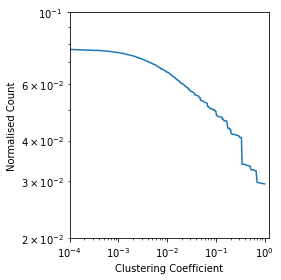

In [88]:
# Solutions

# For the advanced analysis
# Making the distribution of other network measures, for example the clustering coefficient

# read the network data and create a network object
G = nx.read_weighted_edgelist('./data/week2_email.edgelist.txt', comments = '#', create_using=nx.Graph(), nodetype = int, delimiter=',')

G = nx.Graph(G)

G.remove_edges_from( nx.selfloop_edges(G) )

# Draw the pdf and cumulative pdf
plt.figure(figsize = (4,4), tight_layout = True)
plt.ylim(0.02, 0.1)
plt.xlim(0.0001, 1.2)
plt.ylabel('Normalised Count')
plt.xlabel('Clustering Coefficient')

# Calculate the clustering coefficient and create a dataframe
df = pd.DataFrame.from_dict(nx.clustering(G), orient='index', columns =['clustering'])

# extract the values of the clustering coefficient to a list
cc = df.iloc[:,0].values.tolist()
# or
#cc = df['clustering'].values.tolist()  

# Fit the power-law to data
fit = pw.Fit(cc)
print( "x_min: %.3f / alpha: %.3f "% (fit.power_law.xmin, fit.power_law.alpha) )

# Draw the cumulative distribution of the clustering coefficient
pw.plot_ccdf(cc)

plt.show()
